 <h1>Problem Statement (Real-World Business Scenario)</h1>
“An e-commerce jewelry brand is running multi-channel ad campaigns across platforms like Google Ads, Facebook Ads, and DV360. The team wants to understand which creatives, channels, and audience segments drive the most performance (CTR, conversions, ROI) to optimize future campaign spend.”

<h2>Goals of the Product Analyst</h2>
Identify high-ROI campaigns across regions, time, channels, etc.

A/B test performance of creatives, templates, or channels.

Analyze customer behavior: which tags/keywords/landing pages work.

Detect underperforming campaigns (low CTR/CPC/ROI).

Optimize ad spend: by geography, day, network, or creative.



In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import coint

In [4]:
df = pd.read_csv("Marketing campaign dataset.csv")

print(df.head())

   campaign_item_id  no_of_days        time  ext_service_id ext_service_name  \
0              2733           7  2022-05-01             128     Facebook Ads   
1              2733           8  2022-05-02              16            DV360   
2              2733           9  2022-05-03             128     Facebook Ads   
3              2733          10  2022-05-04             128     Facebook Ads   
4              2733          11  2022-05-05               4       Google Ads   

   creative_id  creative_width  creative_height  \
0         1000           300.0            250.0   
1         1000           300.0            250.0   
2         1000           300.0            250.0   
3         1000           300.0            250.0   
4         1000           300.0            250.0   

                          search_tags  template_id  ... exchange_rate  \
0                     #The Power of X         90.0  ...             1   
1                      #Be Bold. Be X         90.0  ...           

In [7]:
df.shape

(72612, 35)

In [8]:
df.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [15]:
pd.isnull(df).sum()

campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
keywords      

In [17]:
df.drop(['position_in_content', 'unique_reach','total_reach','], axis=1, inplace=True)

In [18]:
df.isna().any() 

campaign_item_id       False
no_of_days             False
time                   False
ext_service_id         False
ext_service_name       False
creative_id            False
creative_width          True
creative_height         True
search_tags            False
template_id             True
landing_page           False
advertiser_id          False
advertiser_name        False
network_id             False
approved_budget         True
advertiser_currency    False
channel_id             False
channel_name           False
network_margin         False
campaign_budget_usd    False
impressions            False
clicks                 False
stats_currency         False
currency_code          False
exchange_rate          False
media_cost_usd         False
search_tag_cat         False
cmi_currency_code      False
timezone               False
weekday_cat            False
keywords               False
dtype: bool

In [29]:
df.dropna(inplace=True)

In [30]:
pd.isnull(df).sum()

campaign_item_id       0
no_of_days             0
time                   0
ext_service_id         0
ext_service_name       0
creative_id            0
creative_width         0
creative_height        0
search_tags            0
template_id            0
landing_page           0
advertiser_id          0
advertiser_name        0
network_id             0
approved_budget        0
advertiser_currency    0
channel_id             0
channel_name           0
network_margin         0
campaign_budget_usd    0
impressions            0
clicks                 0
stats_currency         0
currency_code          0
exchange_rate          0
media_cost_usd         0
search_tag_cat         0
cmi_currency_code      0
timezone               0
weekday_cat            0
keywords               0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68880 entries, 0 to 69199
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     68880 non-null  int64  
 1   no_of_days           68880 non-null  int64  
 2   time                 68880 non-null  object 
 3   ext_service_id       68880 non-null  int64  
 4   ext_service_name     68880 non-null  object 
 5   creative_id          68880 non-null  int64  
 6   creative_width       68880 non-null  float64
 7   creative_height      68880 non-null  float64
 8   search_tags          68880 non-null  object 
 9   template_id          68880 non-null  float64
 10  landing_page         68880 non-null  object 
 11  advertiser_id        68880 non-null  int64  
 12  advertiser_name      68880 non-null  object 
 13  network_id           68880 non-null  int64  
 14  approved_budget      68880 non-null  float64
 15  advertiser_currency  68880 non-null  obje

In [6]:
df.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,...,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach
count,72612.000000,72612.000000,72612.000000,72612.000000,69200.000000,69200.000000,69200.000000,72612.000000,72612.000000,7.220600e+04,...,7406.0,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000,0.0,0.0,0.0
mean,3130.143282,27.036344,49.449127,7450.124842,267.810694,223.175578,83.082659,6195.862213,345.272861,1.258064e+05,...,1.0,0.0,617.630284,1370.161847,52.696386,1.0,11.819999,NaN,NaN,NaN
std,142.154918,25.479175,55.881324,4062.384982,92.848075,77.373396,20.847618,387.864576,23.707191,5.626204e+05,...,0.0,0.0,1354.606619,3702.699962,377.308103,0.0,48.370659,NaN,NaN,NaN
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,23.000000,4756.000000,188.000000,4.000000e+02,...,1.0,0.0,2.452316,511.000000,2.000000,1.0,0.000000,NaN,NaN,NaN
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,...,1.0,0.0,205.994550,526.000000,5.000000,1.0,0.435791,NaN,NaN,NaN
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,...,1.0,0.0,377.656676,577.000000,8.000000,1.0,1.709001,NaN,NaN,NaN
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,...,1.0,0.0,755.313351,816.000000,13.000000,1.0,8.276369,NaN,NaN,NaN
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,...,1.0,0.0,39559.896155,153959.000000,31807.000000,1.0,2295.028945,NaN,NaN,NaN


In [9]:
df['channel_name'].unique()  # all unique values


array(['Mobile', 'Social', 'Video', 'Display', 'Search'], dtype=object)

In [10]:
df['channel_name'].value_counts()  # frequency count of each value

channel_name
Mobile     14625
Social     14576
Video      14525
Display    14447
Search     14439
Name: count, dtype: int64

In [11]:
df['CTR'] = df['clicks'] / df['impressions']


df['CPC'] = df['media_cost_usd'] / df['clicks'].replace(0, pd.NA)


df['CPM'] = (df['media_cost_usd'] / df['impressions']) * 1000

In [12]:
df[['CTR', 'CPC', 'CPM']].head()


,CTR,CPC,CPM
0,0.009558,1.757314,16.796313
1,0.016705,2.264398,37.825929
2,0.014988,3.419365,51.250434
3,0.020627,2.400198,49.509884
4,0.013004,3.349505,43.556635


In [13]:
df.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,...,impressions,clicks,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,CTR,CPC,CPM
count,72612.000000,72612.000000,72612.000000,72612.000000,69200.000000,69200.000000,69200.000000,72612.000000,72612.000000,7.220600e+04,...,72612.000000,72612.000000,72612.0,72612.000000,0.0,0.0,0.0,72612.000000,72612.000000,72612.000000
mean,3130.143282,27.036344,49.449127,7450.124842,267.810694,223.175578,83.082659,6195.862213,345.272861,1.258064e+05,...,1370.161847,52.696386,1.0,11.819999,NaN,NaN,NaN,0.017450,0.401968,5.293548
std,142.154918,25.479175,55.881324,4062.384982,92.848075,77.373396,20.847618,387.864576,23.707191,5.626204e+05,...,3702.699962,377.308103,0.0,48.370659,NaN,NaN,NaN,0.030918,0.669154,6.773359
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,23.000000,4756.000000,188.000000,4.000000e+02,...,511.000000,2.000000,1.0,0.000000,NaN,NaN,NaN,0.000887,0.000000,0.000000
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,...,526.000000,5.000000,1.0,0.435791,NaN,NaN,NaN,0.009365,0.070554,0.824017
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,...,577.000000,8.000000,1.0,1.709001,NaN,NaN,NaN,0.013720,0.203686,2.902025
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,...,816.000000,13.000000,1.0,8.276369,NaN,NaN,NaN,0.018762,0.451822,7.891888
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,...,153959.000000,31807.000000,1.0,2295.028945,NaN,NaN,NaN,2.656117,15.727659,128.397470


<h2>Best performing channels</h2>

In [14]:
df.groupby('channel_name')[['CTR', 'CPC']].mean().sort_values(by='CTR', ascending=False)



,CTR,CPC
channel_name,,
Display,0.017782,0.395550
Mobile,0.017520,0.405329
Video,0.017444,0.405400
Search,0.017306,0.406996
Social,0.017202,0.396557


<h2>Best creatives</h2>

In [15]:
df.groupby('creative_id')[['CTR', 'clicks']].mean().sort_values(by='CTR', ascending=False).head(10)


,CTR,clicks
creative_id,,
3200,0.392544,4690.531250
14240,0.362747,2974.952381
3190,0.299756,1105.666667
3170,0.296244,1921.000000
3165,0.286500,1015.875000
14785,0.278404,2124.476190
14395,0.234201,2223.714286
14235,0.210567,2141.238095
14385,0.200316,2180.380952


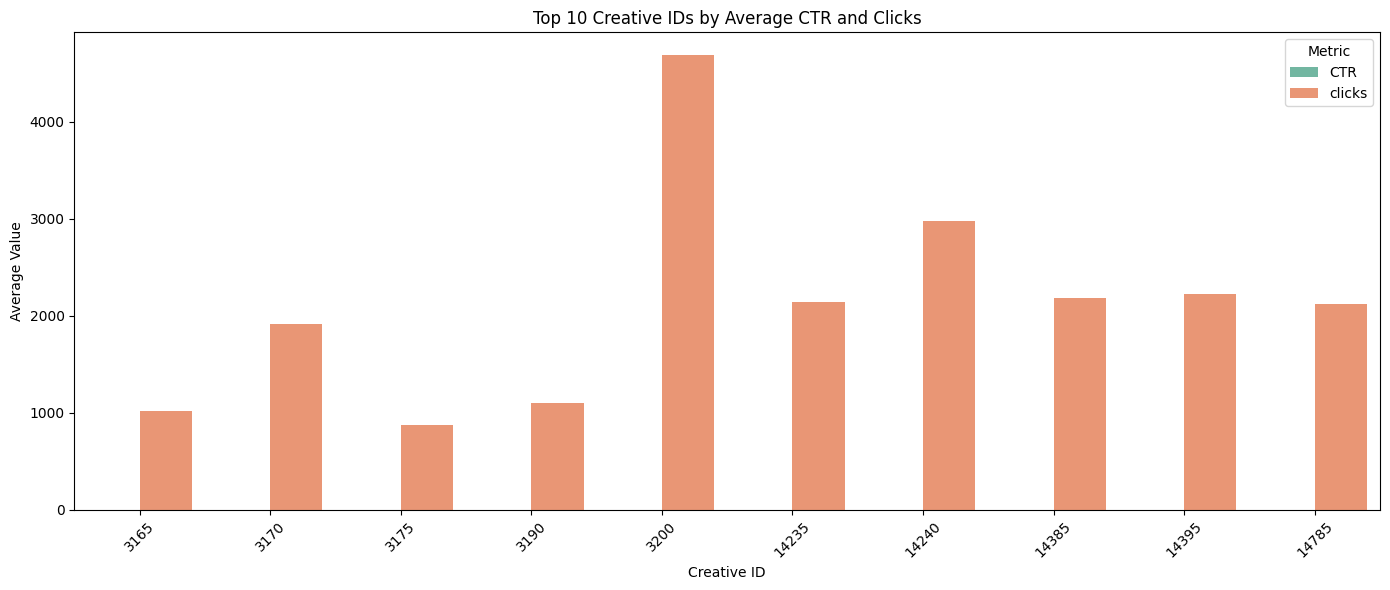

In [16]:
# Step 1: Group by creative_id and compute mean CTR and clicks
grouped = df.groupby('creative_id')[['CTR', 'clicks']].mean()

# Step 2: Sort by CTR and get top 10
top10 = grouped.sort_values(by='CTR', ascending=False).head(10).reset_index()

# Step 3: Melt to long format for seaborn barplot
melted = top10.melt(id_vars='creative_id', value_vars=['CTR', 'clicks'],
                    var_name='Metric', value_name='Value')

# Step 4: Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='creative_id', y='Value', hue='Metric', palette='Set2')

# Labels and styling
plt.title('Top 10 Creative IDs by Average CTR and Clicks')
plt.xlabel('Creative ID')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

In [33]:
df['ROI'] = df['clicks'] / df['media_cost_usd'].replace(0, 1)
df[['campaign_item_id', 'ROI']].sort_values(by='ROI', ascending=False)


,campaign_item_id,ROI
72598,3567,1.000000e+07
72389,3464,2.500000e+06
72549,3559,2.777778e+05
1140,2766,1.600000e+04
65002,3218,1.366743e+04
...,...,...
13602,3219,7.056589e-02
68008,3221,6.505236e-02
68248,3222,6.471966e-02
68260,3222,6.465147e-02


<h2> Day-wise performance:</h2>

In [17]:
df.groupby('weekday_cat')[['CTR']].mean().sort_values(by='CTR', ascending=False)


,CTR
weekday_cat,
week_day,0.017519
week_end,0.017026


In [34]:
# Ensure numeric
df['ROI'] = pd.to_numeric(df['ROI'], errors='coerce')
df['media_cost_usd'] = pd.to_numeric(df['media_cost_usd'], errors='coerce')

# Estimate revenue = ROI * cost
df['estimated_revenue'] = df['ROI'] * df['media_cost_usd']

# Assume $50 per conversion (example)
conversion_value = 50  # adjust as per your business
df['estimated_conversions'] = df['estimated_revenue'] / conversion_value

# Group by ext_service_name
estimated_conv_by_service = df.groupby('ext_service_name')['estimated_conversions'].sum().reset_index()
estimated_conv_by_service = estimated_conv_by_service.sort_values(by='estimated_conversions', ascending=False)

print(estimated_conv_by_service)


  ext_service_name  estimated_conversions
0            DV360               26905.34
1     Facebook Ads               25983.16
2       Google Ads               23605.58


In [20]:
# Step 2: Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['time'])

# Step 3: Create a new column for weekday names
df['weekday_name'] = df['date'].dt.day_name()

df['weekday_name'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [21]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['weekday_name'] = pd.Categorical(df['weekday_name'], categories=weekday_order, ordered=True)


In [22]:
df.groupby('weekday_name')[['CTR']].mean().sort_values(by='CTR', ascending=False)


C:\Users\shahu\AppData\Local\Temp\ipykernel_4660\3046304083.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('weekday_name')[['CTR']].mean().sort_values(by='CTR', ascending=False)


,CTR
weekday_name,
Tuesday,0.018254
Wednesday,0.017695
Thursday,0.017524
Monday,0.017262
Friday,0.017203
Saturday,0.017203
Sunday,0.017026


C:\Users\shahu\AppData\Local\Temp\ipykernel_4660\2124144305.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_grouped, x='ROI', y='channel_name', palette='viridis')


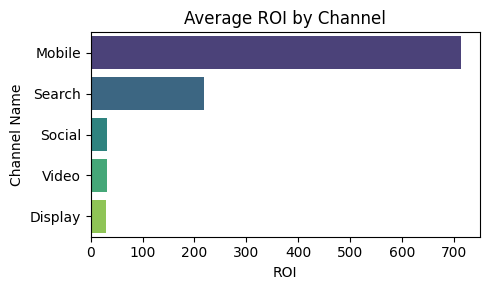

In [35]:
# Group and sort ROI by channel
roi_grouped = df.groupby('channel_name')['ROI'].mean().reset_index().sort_values(by='ROI', ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(data=roi_grouped, x='ROI', y='channel_name', palette='viridis')

plt.title('Average ROI by Channel')
plt.xlabel('ROI')
plt.ylabel('Channel Name')
plt.tight_layout()
plt.show()


In [24]:

# Filter two groups
A = df[df['channel_name'] == 'Social']['CTR']
B = df[df['channel_name'] == 'Mobile']['CTR']

# T-test
t_stat, p_value = ttest_ind(A, B, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.8384991794680473, P-value: 0.4017572723109738


In [25]:
df.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords', 'CTR',
       'CPC', 'CPM', 'date', 'weekday_name'],
      dtype='object')

In [26]:
# Display unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Unique values: {unique_values[:10]}")  # Show only first 10 unique values for readability


Column: campaign_item_id
Number of unique values: 157
Unique values: [2733 2766 2802 2850 2851 2879 3223 3054 3132 3150]

Column: no_of_days
Number of unique values: 119
Unique values: [ 7  8  9 10 11 53 54 55 56 57]

Column: time
Number of unique values: 224
Unique values: ['2022-05-01' '2022-05-02' '2022-05-03' '2022-05-04' '2022-05-05'
 '2022-05-31' '2022-06-01' '2022-06-02' '2022-06-03' '2022-06-04']

Column: ext_service_id
Number of unique values: 3
Unique values: [128  16   4]

Column: ext_service_name
Number of unique values: 3
Unique values: ['Facebook Ads' 'DV360' 'Google Ads']

Column: creative_id
Number of unique values: 2922
Unique values: [1000 1005 1010 1015 1020 1025 1030 1035 1040 1045]

Column: creative_width
Number of unique values: 3
Unique values: [300.   0.  nan]

Column: creative_height
Number of unique values: 3
Unique values: [250.   0.  nan]

Column: search_tags
Number of unique values: 6
Unique values: ['#The Power of X' '#Be Bold. Be X' '#Embrace Your Indivi

In [36]:
# Ensure CTR and ROI are numeric (if not already)
df['CTR'] = pd.to_numeric(df['CTR'], errors='coerce')
df['ROI'] = pd.to_numeric(df['ROI'], errors='coerce')

# Group by search_tags and calculate average CTR and ROI
grouped = df.groupby('search_tags').agg({
    'CTR': 'mean',
    'ROI': 'mean',
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index()

# Remove any rows with NaN
grouped = grouped.dropna(subset=['CTR', 'ROI'])

# Sort by CTR or ROI
top_by_ctr = grouped.sort_values(by='CTR', ascending=False)
top_by_roi = grouped.sort_values(by='ROI', ascending=False)

# Show top 10 tags by CTR and ROI
print("🔝 Top 10 search_tags by CTR:")
print(top_by_ctr.head(10))

print("\n💰 Top 10 search_tags by ROI:")
print(top_by_roi.head(10))

🔝 Top 10 search_tags by CTR:
                                search_tags       CTR         ROI  clicks  \
2                           #The Power of X  0.017773   33.127629  720431   
3    #The Ultimate Fashion Statement with X  0.017745   30.315268  675995   
5                         #Timeless X Style  0.017642  240.483831  612588   
4  #The X Factor - Fashion for the Fearless  0.017322  889.969253  619180   
0                            #Be Bold. Be X  0.017192   29.381228  597062   
1        #Embrace Your Individuality with X  0.017030   29.011588  601134   

   impressions  
2     17064153  
3     17127241  
5     15820164  
4     16768100  
0     16178840  
1     16531694  

💰 Top 10 search_tags by ROI:
                                search_tags       CTR         ROI  clicks  \
4  #The X Factor - Fashion for the Fearless  0.017322  889.969253  619180   
5                         #Timeless X Style  0.017642  240.483831  612588   
2                           #The Power of X  0.0177

<h1>Descriptive Analytics</h1>

<h2>Top performing search_tags by CTR/ROI</h2>

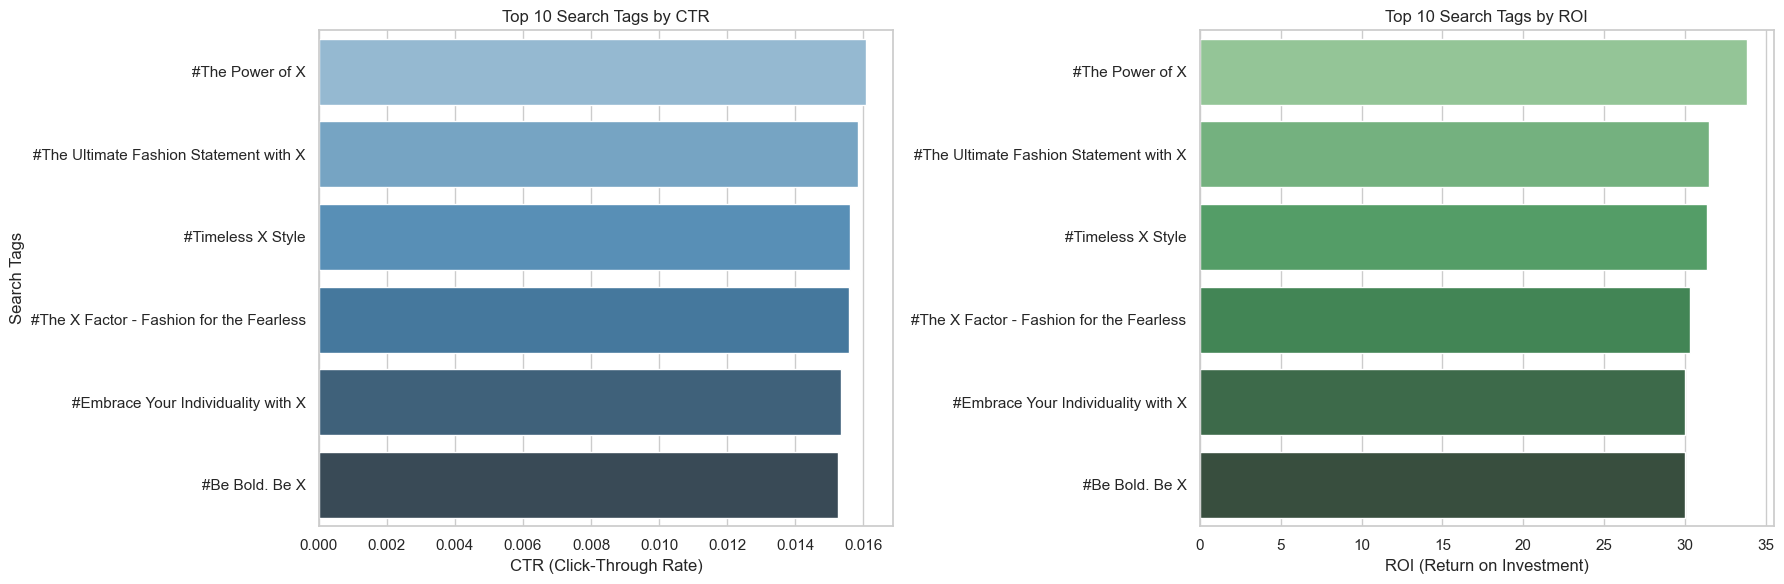

In [104]:
# Ensure numeric types
df['CTR'] = pd.to_numeric(df['CTR'], errors='coerce')
df['ROI'] = pd.to_numeric(df['ROI'], errors='coerce')

# Group and filter
grouped = df.groupby('search_tags').agg({
    'CTR': 'mean',
    'ROI': 'mean',
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index()

grouped = grouped[grouped['impressions'] > 1000]

# Top 10
top_ctr = grouped.sort_values(by='CTR', ascending=False).head(10)
top_roi = grouped.sort_values(by='ROI', ascending=False).head(10)

# Set seaborn style
sns.set(style="whitegrid")

# 🔥 Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# CTR Plot
sns.barplot(
    data=top_ctr,
    x='CTR',
    y='search_tags',
    hue='search_tags',
    palette='Blues_d',
    dodge=False,
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 Search Tags by CTR')
axes[0].set_xlabel('CTR (Click-Through Rate)')
axes[0].set_ylabel('Search Tags')

# ROI Plot
sns.barplot(
    data=top_roi,
    x='ROI',
    y='search_tags',
    hue='search_tags',
    palette='Greens_d',
    dodge=False,
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 10 Search Tags by ROI')
axes[1].set_xlabel('ROI (Return on Investment)')
axes[1].set_ylabel('')

# Layout adjustment
plt.tight_layout()
plt.show()

<h2>Which channel performs best by ROI: Social vs Search vs Video</h2>

['Mobile' 'Social' 'Video' 'Display' 'Search']
  channel_name        ROI  impressions  clicks       CTR       CPC
3       Social  33.352504     15312248  420373  0.015260  0.397920
4        Video  32.224392     15767027  480180  0.015751  0.405480
2       Search  26.784865     15445842  438039  0.015597  0.405971


C:\Users\shahu\AppData\Local\Temp\ipykernel_2984\334817216.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


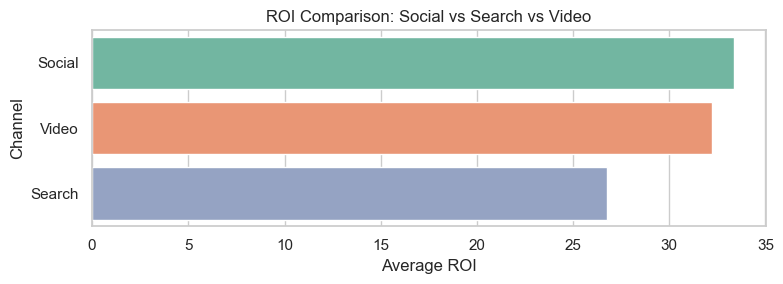

In [107]:
# Preview unique channel names (optional)
print(df['channel_name'].unique())

# Group by channel_name to compute average ROI and impression volume
channel_performance = df.groupby('channel_name').agg({
    'ROI': 'mean',
    'impressions': 'sum',
    'clicks': 'sum',
    'CTR': 'mean',
    'CPC': 'mean'
}).reset_index()

# Filter only desired channels: Social, Search, Video
filtered_channels = channel_performance[channel_performance['channel_name'].isin(['Social', 'Search', 'Video'])]

# Sort by ROI
filtered_channels = filtered_channels.sort_values(by='ROI', ascending=False)

# View table (optional)
print(filtered_channels)

# 📊 Plot ROI by Channel
plt.figure(figsize=(8, 3))
sns.barplot(
    data=filtered_channels,
    x='ROI',
    y='channel_name',
    palette='Set2'
)
plt.title("ROI Comparison: Social vs Search vs Video")
plt.xlabel("Average ROI")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()

<h2>Weekday vs Weekend performance</h2>

In [108]:
# Create a new column: Weekday vs Weekend
df['day_type'] = df['weekday_name'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Group by Weekday/Weekend
day_type_summary = df.groupby('day_type').agg({
    'ROI': 'mean',
    'CTR': 'mean',
    'CPC': 'mean',
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index()

# Print summary
print(day_type_summary)

  day_type        ROI       CTR       CPC   clicks  impressions
0  Weekday  32.489484  0.015702  0.400300  1652075     54805305
1  Weekend  27.827207  0.015439  0.407774   632785     22870613


<h2>Geographic analysis using timezone, advertiser_currency, landing_page</h2>

<h2>Timezone-Based Analysis</h2>

In [120]:
timezone_perf = df.groupby('timezone').agg({
    'ROI': 'mean',
    'CTR': 'mean',
    'CPC': 'mean',
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index().sort_values(by='ROI', ascending=False)

print(timezone_perf.head(7))


           timezone         ROI       CTR       CPC   clicks  impressions
0      Africa/Cairo  103.522273  0.022832  0.366101    27396       786593
1  America/New_York   41.969520  0.013814  0.508391    68399      4688532
3      Asia/Kolkata   29.558135  0.015805  0.384869  2178686     71503426
4       Asia/Muscat   10.312441  0.011539  0.724144     6056       514708
2     Asia/Calcutta    1.917094  0.022761  0.732258     3346       135220
5    Asia/Singapore    0.403661  0.014976  2.638156      152         9471
6        US/Eastern    0.373707  0.021488  2.888524      825        37968


<h2>Advertiser Currency Performance</h2>

In [121]:
currency_perf = df.groupby('advertiser_currency').agg({
    'ROI': 'mean',
    'CTR': 'mean',
    'CPC': 'mean',
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index().sort_values(by='ROI', ascending=False)

print(currency_perf.head())


  advertiser_currency         ROI       CTR       CPC   clicks  impressions
1                 EGP  103.522273  0.022832  0.366101    27396       786593
4                 USD   39.474180  0.013697  0.537627    75280      5241208
0                 AED   32.671149  0.012642  0.386760   475653     35478024
2                 INR    6.566485  0.038906  0.375321  1706379     36160622
3                 SGD    0.403661  0.014976  2.638156      152         9471


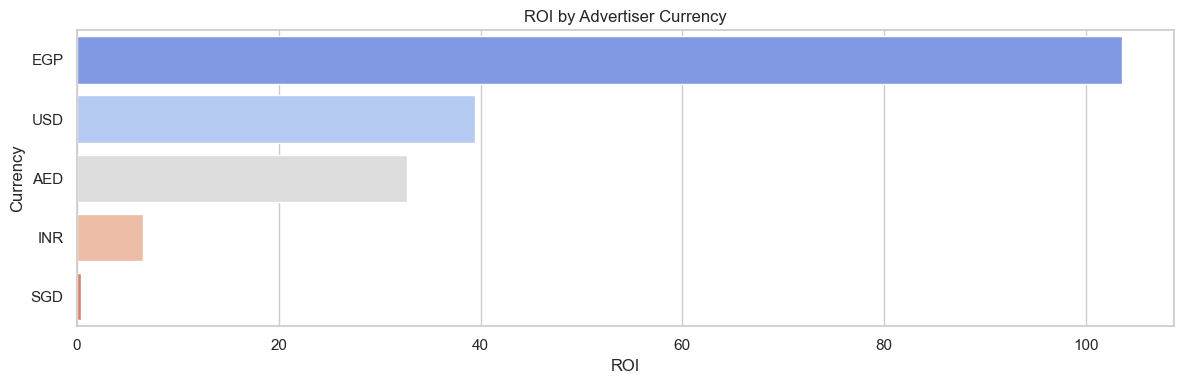

In [130]:
plt.figure(figsize=(12, 4))
sns.barplot(
    data=currency_perf,
    x='ROI',
    y='advertiser_currency',
    hue='advertiser_currency',     # Use hue = y
    palette='coolwarm',
    legend=False                   # Hide the legend
)
plt.title('ROI by Advertiser Currency')
plt.xlabel('ROI')
plt.ylabel('Currency')
plt.tight_layout()
plt.show()


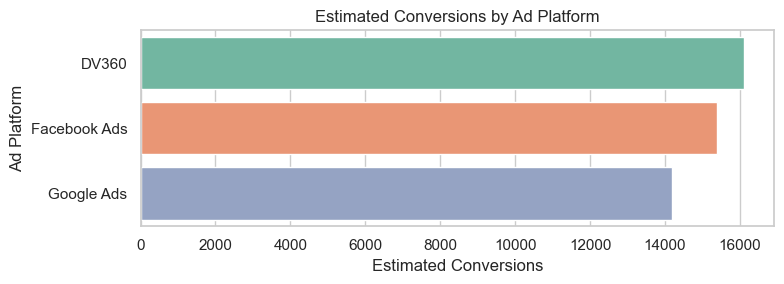

In [134]:

plt.figure(figsize=(8, 3))
sns.barplot(
    data=estimated_conv_by_service,
    x='estimated_conversions',
    y='ext_service_name',
    hue='ext_service_name',
    palette='Set2',
    legend=False
)
plt.title("Estimated Conversions by Ad Platform")
plt.xlabel("Estimated Conversions")
plt.ylabel("Ad Platform")
plt.tight_layout()
plt.show()


   ext_service_name conversion_range  number_of_days
2             DV360             1–15              97
1             DV360            16–30              35
3             DV360            31–50              18
4             DV360           51–100              34
0             DV360          101–250              28
5             DV360             >250               9
8      Facebook Ads             1–15              97
7      Facebook Ads            16–30              39
9      Facebook Ads            31–50              14
10     Facebook Ads           51–100              29
6      Facebook Ads          101–250              34
11     Facebook Ads             >250               6
14       Google Ads             1–15             102
13       Google Ads            16–30              38
15       Google Ads            31–50               7
16       Google Ads           51–100              43
12       Google Ads          101–250              26
17       Google Ads             >250          

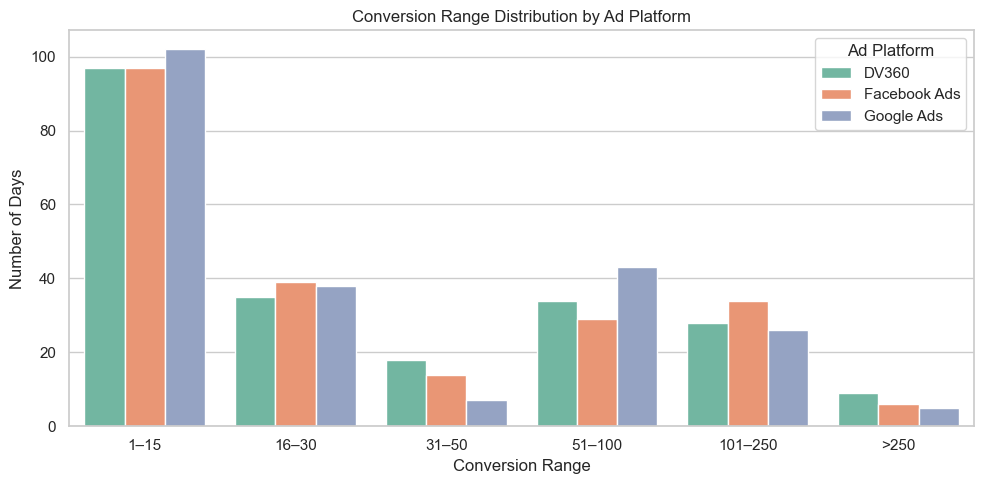

In [143]:
# Step 1: Make sure 'estimated_conversions' is available
df['ROI'] = pd.to_numeric(df['ROI'], errors='coerce')
df['media_cost_usd'] = pd.to_numeric(df['media_cost_usd'], errors='coerce')
df['estimated_revenue'] = df['ROI'] * df['media_cost_usd']
df['estimated_conversions'] = df['estimated_revenue'] / 50  # Adjust this value as needed
df['estimated_conversions'] = df['estimated_conversions'].round(0)

# Group by both ad platform and day
daily_conv_by_service = df.groupby(['ext_service_name', 'date'])['estimated_conversions'].sum().reset_index()
daily_conv_by_service['estimated_conversions'] = daily_conv_by_service['estimated_conversions'].round(0)

# Define conversion range
def get_conversion_range(conv):
    if conv <= 15:
        return '1–15'
    elif conv <= 30:
        return '16–30'
    elif conv <= 50:
        return '31–50'
    elif conv <= 100:
        return '51–100'
    elif conv <= 250:
        return '101–250'
    else:
        return '>250'

# Apply to column
daily_conv_by_service['conversion_range'] = daily_conv_by_service['estimated_conversions'].apply(get_conversion_range)

# Count number of days in each range per ad platform
range_summary = daily_conv_by_service.groupby(['ext_service_name', 'conversion_range']).size().reset_index(name='number_of_days')

# Sort for clean output
range_order = ['1–15', '16–30', '31–50', '51–100', '101–250', '>250']
range_summary['conversion_range'] = pd.Categorical(range_summary['conversion_range'], categories=range_order, ordered=True)
range_summary = range_summary.sort_values(['ext_service_name', 'conversion_range'])

print(range_summary)


plt.figure(figsize=(10, 5))
sns.barplot(
    data=range_summary,
    x='conversion_range',
    y='number_of_days',
    hue='ext_service_name',
    palette='Set2'
)

plt.title("Conversion Range Distribution by Ad Platform")
plt.xlabel("Conversion Range")
plt.ylabel("Number of Days")
plt.legend(title="Ad Platform")
plt.tight_layout()
plt.show()

🔵 DV360:
Most diversified spread across ranges.

Highest number of days with >250 conversions (9 days).

Stronger performance in mid-to-high ranges.

Suggests it's a more consistently scalable platform for conversions.

🔵 Facebook Ads:
Many days in low range (1–15 = 97 days).

Performs better in mid-range (101–250 = 34 days) than Google Ads.

Slightly stronger overall than Google Ads on higher-value days.

🔵 Google Ads:
Most days in the lowest conversion range (1–15 = 102 days).

Fewest days with >250 conversions (only 5).

Appears to be reliable but weak in scalability.



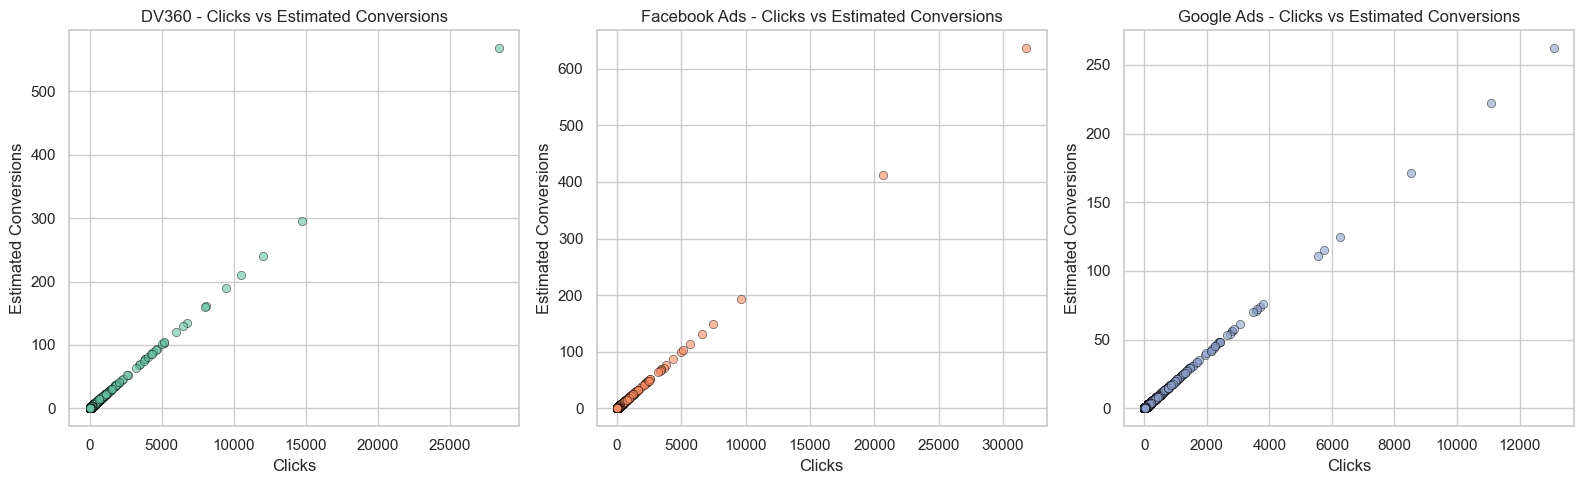

In [146]:
plt.figure(figsize=(16, 5))
platforms = ['DV360', 'Facebook Ads', 'Google Ads']

for i, platform in enumerate(platforms):
    plt.subplot(1, 3, i + 1)
    subset = df[df['ext_service_name'] == platform]
    sns.scatterplot(
        data=subset,
        x='clicks',
        y='estimated_conversions',
        color=sns.color_palette('Set2')[i],
        alpha=0.6,
        edgecolor='black'
    )
    plt.title(f'{platform} - Clicks vs Estimated Conversions')
    plt.xlabel('Clicks')
    plt.ylabel('Estimated Conversions')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [38]:
# Ensure data types are numeric
df['clicks'] = pd.to_numeric(df['clicks'], errors='coerce')
df['estimated_conversions'] = pd.to_numeric(df['estimated_conversions'], errors='coerce')

# Drop rows with NaN values in either column
df_clean = df.dropna(subset=['clicks', 'estimated_conversions'])

# Group by platform and calculate Pearson correlation
correlation_by_platform = df_clean.groupby('ext_service_name').apply(
    lambda x: x['clicks'].corr(x['estimated_conversions'])
).reset_index(name='correlation_clicks_conversions')

print(correlation_by_platform)


  ext_service_name  correlation_clicks_conversions
0            DV360                        1.000000
1     Facebook Ads                        0.999999
2       Google Ads                        0.999999


C:\Users\shahu\AppData\Local\Temp\ipykernel_4660\1596598137.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_platform = df_clean.groupby('ext_service_name').apply(


Clicks ≈ Conversions: All platforms show almost perfect correlation (≈1.0) — more clicks lead to more conversions.

Consistent Performance: DV360, Facebook Ads, and Google Ads perform similarly in conversion behavior.

Reliable Predictability: Conversions can be accurately predicted from clicks. Great for optimization and forecasting.

<h1>hypothesis Testing Simulation</h1>

In [42]:
# Calculate conversion rates per platform
df['conversion_rate'] = df['estimated_conversions'] / df['clicks']

# Filter data for Facebook Ads and DV360
fb = df[df['ext_service_name'] == 'Facebook Ads']['conversion_rate'].dropna()
dv = df[df['ext_service_name'] == 'DV360']['conversion_rate'].dropna()


t_stat, p_value = ttest_ind(fb, dv, equal_var=False, alternative='greater')  # one-tailed test
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")



T-statistic: -0.4330, P-value: 0.6675


There is no significant difference in conversion rates between Facebook Ads and DV360 (p = 0.6675). We fail to reject the null hypothesis, meaning both platforms perform similarly in terms of conversion efficiency.

<h2>A/B Testing</h2>

In [43]:
# Filter daily conversion data for each platform
fb_conversions = df[df['ext_service_name'] == 'Facebook Ads']['estimated_conversions'].dropna()
google_conversions = df[df['ext_service_name'] == 'Google Ads']['estimated_conversions'].dropna()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(fb_conversions, google_conversions, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 1.4444, P-value: 0.1486


There is no statistically significant difference in average conversions between Facebook Ads and Google Ads (p = 0.1486 > 0.05).
👉 This suggests both platforms perform similarly in terms of driving conversions.

In [45]:
# Filter only DV360 data
dv360_df = df[df['ext_service_name'] == 'DV360'].copy()

# Clean data
dv360_df['clicks'] = pd.to_numeric(dv360_df['clicks'], errors='coerce')
dv360_df['estimated_conversions'] = pd.to_numeric(dv360_df['estimated_conversions'], errors='coerce')
dv360_df = dv360_df.dropna(subset=['clicks', 'estimated_conversions'])

# Prepare variables
X = dv360_df[['clicks']]
y = dv360_df['estimated_conversions']

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f"Regression Equation: estimated_conversions = {slope:.2f} * clicks + {intercept:.2f}")

Regression Equation: estimated_conversions = 0.02 * clicks + -0.00


For DV360, every 100 clicks result in approximately 2 estimated conversions (based on the regression equation:
estimated_conversions = 0.02 × clicks).

➡️ The relationship is positive and linear, meaning more clicks generally lead to more conversions on DV360.

<h2>analyzed dv360 campaigen metrics over time</h2>

In [46]:
# Filter DV360 data
dv360_df = df[df['ext_service_name'] == 'DV360'].copy()

# Ensure 'date' column is in datetime format
dv360_df['date'] = pd.to_datetime(dv360_df['date'])

# Group by date and calculate metrics
dv360_time_series = dv360_df.groupby('date').agg({
    'clicks': 'sum',
    'impressions': 'sum',
    'media_cost_usd': 'sum',
    'ROI': 'mean',
    'estimated_conversions': 'sum'
}).reset_index()


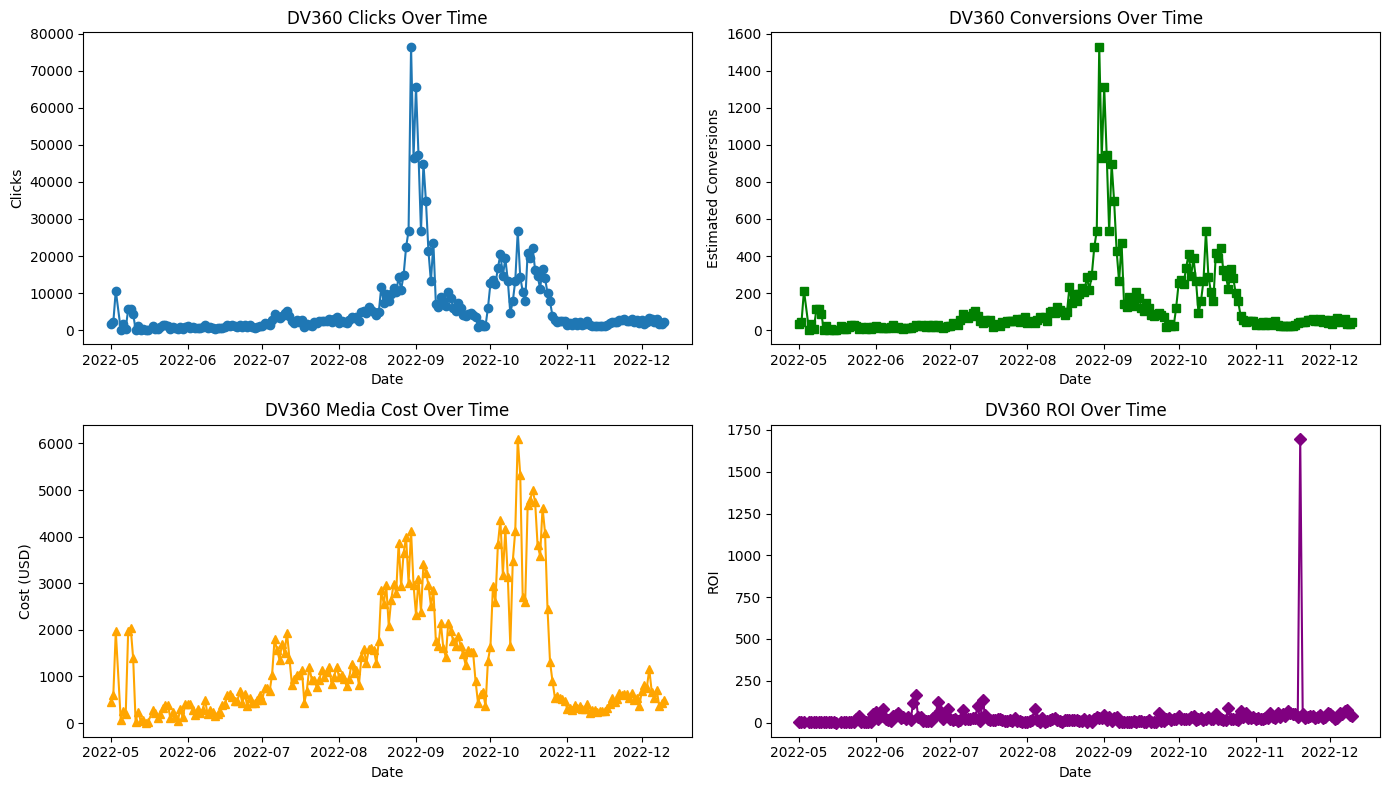

In [47]:

plt.figure(figsize=(14, 8))

# Clicks over time
plt.subplot(2, 2, 1)
plt.plot(dv360_time_series['date'], dv360_time_series['clicks'], marker='o')
plt.title('DV360 Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Conversions over time
plt.subplot(2, 2, 2)
plt.plot(dv360_time_series['date'], dv360_time_series['estimated_conversions'], marker='s', color='green')
plt.title('DV360 Conversions Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Conversions')

# Media cost over time
plt.subplot(2, 2, 3)
plt.plot(dv360_time_series['date'], dv360_time_series['media_cost_usd'], marker='^', color='orange')
plt.title('DV360 Media Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost (USD)')

# ROI over time
plt.subplot(2, 2, 4)
plt.plot(dv360_time_series['date'], dv360_time_series['ROI'], marker='D', color='purple')
plt.title('DV360 ROI Over Time')
plt.xlabel('Date')
plt.ylabel('ROI')

plt.tight_layout()
plt.show()


In [48]:


# Filter DV360 data
dv360_df = df[df['ext_service_name'] == 'DV360'].copy()

# Ensure date column is in datetime format
dv360_df['date'] = pd.to_datetime(dv360_df['date'])

# Make sure conversions are numeric
dv360_df['estimated_conversions'] = pd.to_numeric(dv360_df['estimated_conversions'], errors='coerce')

# Drop rows with missing values in required columns
dv360_df.dropna(subset=['estimated_conversions', 'date'], inplace=True)

# =============================
# 📅 Weekly conversions
dv360_df['week'] = dv360_df['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_conversions = dv360_df.groupby('week')['estimated_conversions'].sum().reset_index()

# 📅 Monthly conversions
dv360_df['month'] = dv360_df['date'].dt.to_period('M').astype(str)
monthly_conversions = dv360_df.groupby('month')['estimated_conversions'].sum().reset_index()

# Show results
print("📊 Weekly Conversions:")
print(weekly_conversions)

print("\n📊 Monthly Conversions:")
print(monthly_conversions)


📊 Weekly Conversions:
         week  estimated_conversions
0  2022-04-25                  32.26
1  2022-05-02                 414.14
2  2022-05-09                 234.78
3  2022-05-16                  84.06
4  2022-05-23                  99.64
5  2022-05-30                  98.78
6  2022-06-06                  96.44
7  2022-06-13                 127.54
8  2022-06-20                 155.52
9  2022-06-27                 160.80
10 2022-07-04                 473.70
11 2022-07-11                 421.90
12 2022-07-18                 229.88
13 2022-07-25                 388.14
14 2022-08-01                 361.84
15 2022-08-08                 648.72
16 2022-08-15                1005.12
17 2022-08-22                1878.46
18 2022-08-29                6687.72
19 2022-09-05                2302.90
20 2022-09-12                1032.26
21 2022-09-19                 616.30
22 2022-09-26                 740.98
23 2022-10-03                2032.34
24 2022-10-10                2026.42
25 2022-10-17   

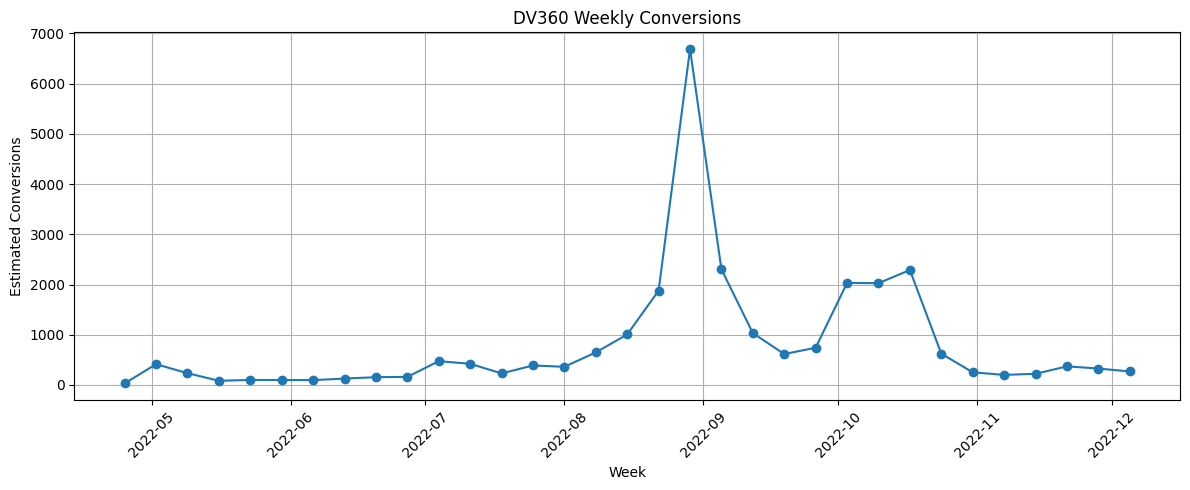

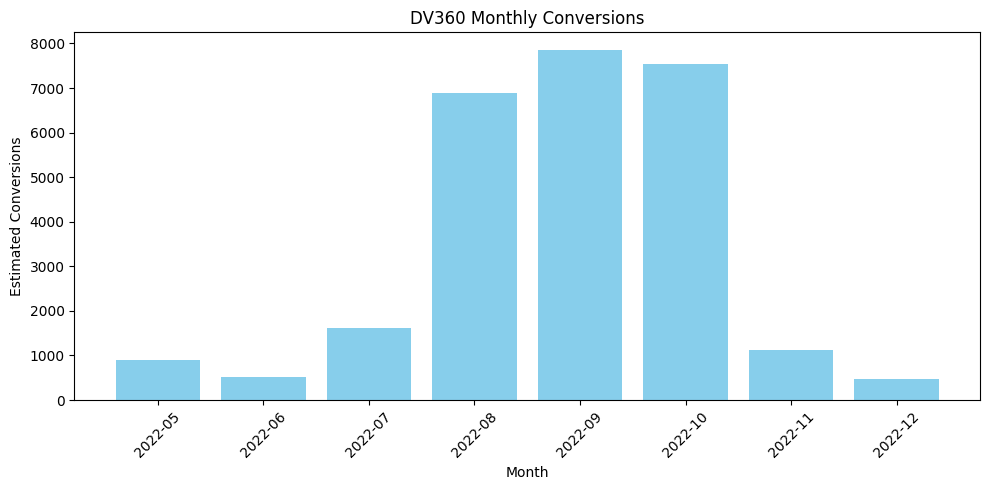

In [49]:

# Weekly plot
plt.figure(figsize=(12, 5))
plt.plot(weekly_conversions['week'], weekly_conversions['estimated_conversions'], marker='o')
plt.title("DV360 Weekly Conversions")
plt.xlabel("Week")
plt.ylabel("Estimated Conversions")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly plot
plt.figure(figsize=(10, 5))
plt.bar(monthly_conversions['month'], monthly_conversions['estimated_conversions'], color='skyblue')
plt.title("DV360 Monthly Conversions")
plt.xlabel("Month")
plt.ylabel("Estimated Conversions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:

# Filter for DV360 only
dv360_df = df[df['ext_service_name'] == 'DV360'].copy()

# Ensure correct date and numeric formats
dv360_df['date'] = pd.to_datetime(dv360_df['date'])
dv360_df['estimated_conversions'] = pd.to_numeric(dv360_df['estimated_conversions'], errors='coerce')

# Drop rows with missing values
dv360_df.dropna(subset=['estimated_conversions', 'date'], inplace=True)

# Create a week column (week starts on Monday by default)
dv360_df['week'] = dv360_df['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by week
weekly_conversions = dv360_df.groupby('week')['estimated_conversions'].sum().reset_index()

# Display result
print("📊 DV360 Weekly Estimated Conversions:")
print(weekly_conversions)


📊 DV360 Weekly Estimated Conversions:
         week  estimated_conversions
0  2022-04-25                  32.26
1  2022-05-02                 414.14
2  2022-05-09                 234.78
3  2022-05-16                  84.06
4  2022-05-23                  99.64
5  2022-05-30                  98.78
6  2022-06-06                  96.44
7  2022-06-13                 127.54
8  2022-06-20                 155.52
9  2022-06-27                 160.80
10 2022-07-04                 473.70
11 2022-07-11                 421.90
12 2022-07-18                 229.88
13 2022-07-25                 388.14
14 2022-08-01                 361.84
15 2022-08-08                 648.72
16 2022-08-15                1005.12
17 2022-08-22                1878.46
18 2022-08-29                6687.72
19 2022-09-05                2302.90
20 2022-09-12                1032.26
21 2022-09-19                 616.30
22 2022-09-26                 740.98
23 2022-10-03                2032.34
24 2022-10-10                2026.42


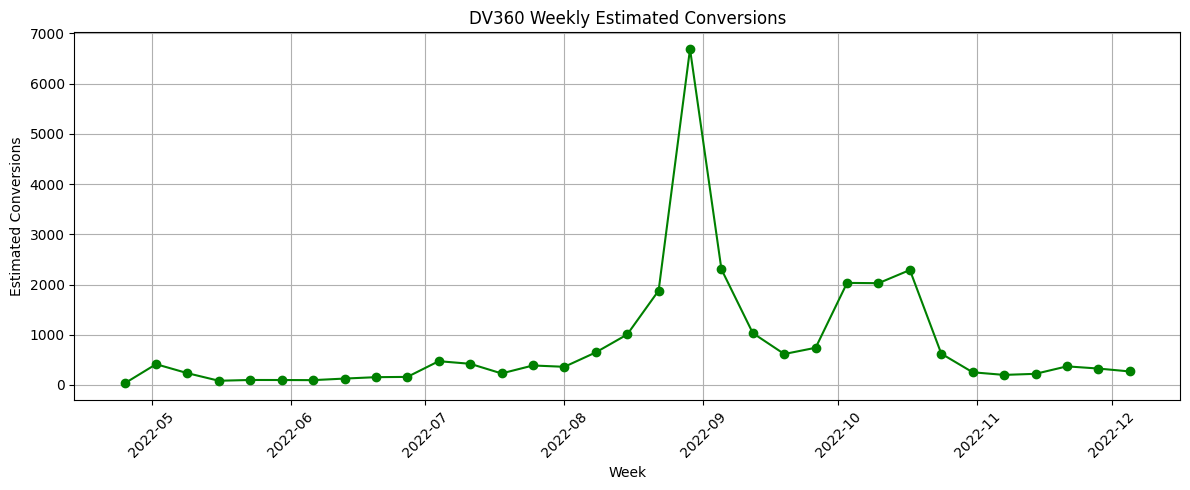

In [51]:

plt.figure(figsize=(12, 5))
plt.plot(weekly_conversions['week'], weekly_conversions['estimated_conversions'], marker='o', color='green')
plt.title("DV360 Weekly Estimated Conversions")
plt.xlabel("Week")
plt.ylabel("Estimated Conversions")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:

# Filter for DV360 platform
dv360_df = df[df['ext_service_name'] == 'DV360'].copy()

# Ensure numeric types
dv360_df['media_cost_usd'] = pd.to_numeric(dv360_df['media_cost_usd'], errors='coerce')
dv360_df['estimated_conversions'] = pd.to_numeric(dv360_df['estimated_conversions'], errors='coerce')

# Drop rows with missing or zero conversions to avoid division by zero
dv360_df = dv360_df[(dv360_df['estimated_conversions'] > 0) & (~dv360_df['media_cost_usd'].isna())]

# Calculate cost per conversion
dv360_df['cost_per_conversion'] = dv360_df['media_cost_usd'] / dv360_df['estimated_conversions']

# Display results
print(dv360_df[['date', 'media_cost_usd', 'estimated_conversions', 'cost_per_conversion']].head())


         date  media_cost_usd  estimated_conversions  cost_per_conversion
1  2022-05-02       99.633496                   0.88           113.219882
7  2022-06-02       31.436393                   0.24           130.984971
8  2022-06-03        5.409166                   0.10            54.091660
13 2022-06-08       11.652413                   0.16            72.827581
16 2022-06-11        9.375291                   0.20            46.876455


In [53]:
avg_cpc_dv360 = dv360_df['cost_per_conversion'].mean()
print(f"Average Cost per Conversion (DV360): ${avg_cpc_dv360:.2f}")


Average Cost per Conversion (DV360): $20.28


In [55]:


# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for DV360 platform
dv360_df = df[df['ext_service_name'] == 'DV360'].copy()

# Ensure numeric types
dv360_df['media_cost_usd'] = pd.to_numeric(dv360_df['media_cost_usd'], errors='coerce')
dv360_df['estimated_conversions'] = pd.to_numeric(dv360_df['estimated_conversions'], errors='coerce')

# Remove rows with invalid or zero conversions
dv360_df = dv360_df[(dv360_df['estimated_conversions'] > 0) & (~dv360_df['media_cost_usd'].isna())]

# ===============================
# 📅 WEEKLY CPC
dv360_df['week'] = dv360_df['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_cpc = dv360_df.groupby('week').apply(
    lambda x: x['media_cost_usd'].sum() / x['estimated_conversions'].sum()
).reset_index(name='weekly_cost_per_conversion')

# ===============================
# 📆 MONTHLY CPC
dv360_df['month'] = dv360_df['date'].dt.to_period('M').astype(str)
monthly_cpc = dv360_df.groupby('month').apply(
    lambda x: x['media_cost_usd'].sum() / x['estimated_conversions'].sum()
).reset_index(name='monthly_cost_per_conversion')

# 🔍 Show Results
print("Weekly Cost per Conversion (DV360):")
print(weekly_cpc)

print("\nMonthly Cost per Conversion (DV360):")
print(monthly_cpc)


Weekly Cost per Conversion (DV360):
         week  weekly_cost_per_conversion
0  2022-04-25                   13.716870
1  2022-05-02                   12.219458
2  2022-05-09                   16.417320
3  2022-05-16                   13.537470
4  2022-05-23                   16.181103
5  2022-05-30                   21.450775
6  2022-06-06                   19.487414
7  2022-06-13                   23.703566
8  2022-06-20                   23.104187
9  2022-06-27                   24.550960
10 2022-07-04                   20.381637
11 2022-07-11                   19.658756
12 2022-07-18                   25.617280
13 2022-07-25                   19.197484
14 2022-08-01                   19.484200
15 2022-08-08                   14.572129
16 2022-08-15                   14.994075
17 2022-08-22                   12.173860
18 2022-08-29                    3.184297
19 2022-09-05                    7.433603
20 2022-09-12                   12.060867
21 2022-09-19                   16.03696

C:\Users\shahu\AppData\Local\Temp\ipykernel_4660\521727776.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_cpc = dv360_df.groupby('week').apply(
C:\Users\shahu\AppData\Local\Temp\ipykernel_4660\521727776.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_cpc = dv360_df.groupby('month').apply(


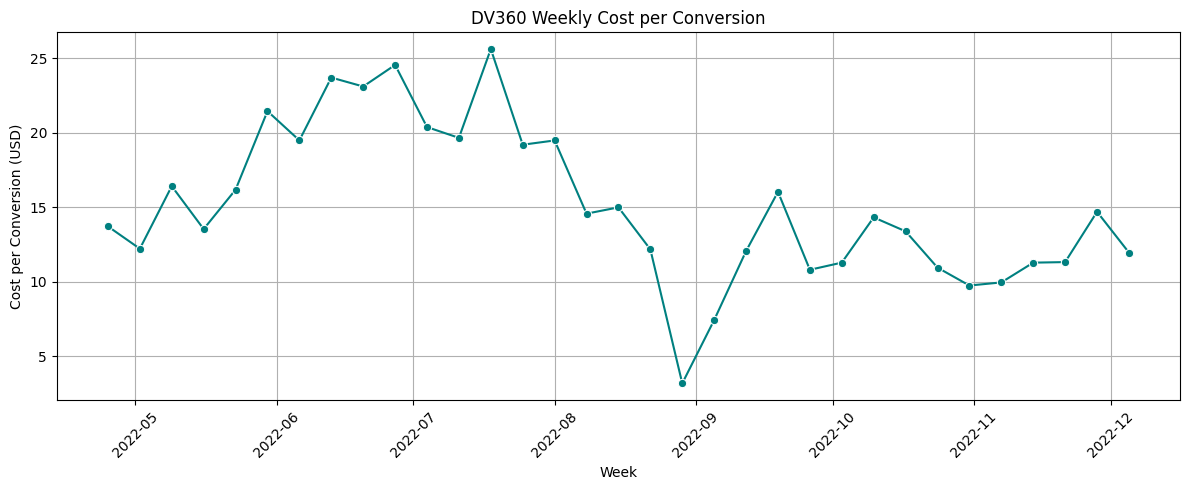

In [56]:
# Weekly CPC Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_cpc, x='week', y='weekly_cost_per_conversion', marker='o', color='teal')
plt.title('DV360 Weekly Cost per Conversion')
plt.xlabel('Week')
plt.ylabel('Cost per Conversion (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\shahu\AppData\Local\Temp\ipykernel_4660\897652602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_cpc, x='month', y='monthly_cost_per_conversion', palette='coolwarm')


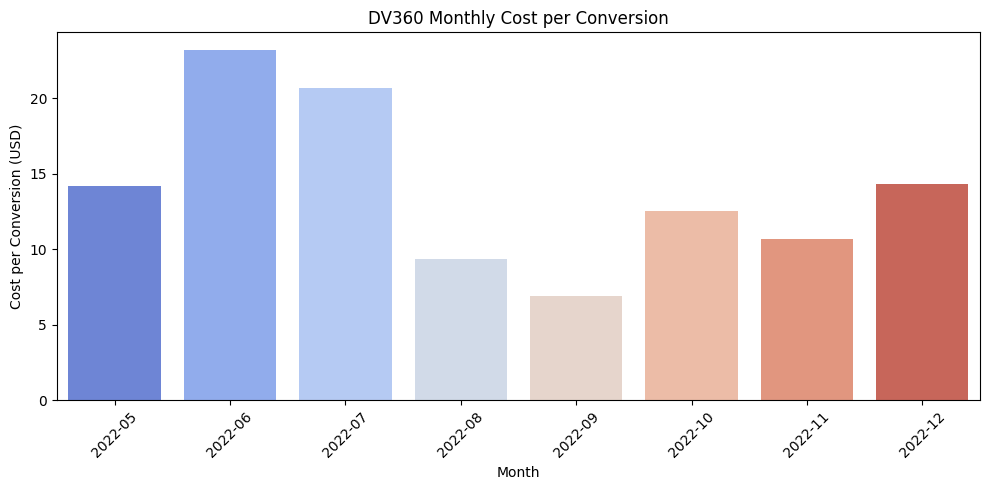

In [57]:
# Monthly CPC Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_cpc, x='month', y='monthly_cost_per_conversion', palette='coolwarm')
plt.title('DV360 Monthly Cost per Conversion')
plt.xlabel('Month')
plt.ylabel('Cost per Conversion (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# Filter data for DV360
dv360_df = df[df['ext_service_name'] == 'DV360'].copy()

# Convert to numeric (if not already)
dv360_df['media_cost_usd'] = pd.to_numeric(dv360_df['media_cost_usd'], errors='coerce')
dv360_df['estimated_conversions'] = pd.to_numeric(dv360_df['estimated_conversions'], errors='coerce')

# Drop NaNs
dv360_df = dv360_df.dropna(subset=['media_cost_usd', 'estimated_conversions'])

# Check correlation (optional)
print(dv360_df[['media_cost_usd', 'estimated_conversions']].corr())

score, pvalue, _ = coint(dv360_df['media_cost_usd'], dv360_df['estimated_conversions'])
print(f"Cointegration test p-value: {pvalue:.4f}")


                       media_cost_usd  estimated_conversions
media_cost_usd               1.000000               0.616511
estimated_conversions        0.616511               1.000000
Cointegration test p-value: 0.0000


There is a strong long-term equilibrium relationship between DV360 ad spend and conversions.

✅ Correlation = 0.62 → moderate positive relationship.

✅ Cointegration p-value = 0.0000 → statistically significant long-term linkage.

Conclusion: In the long run, increasing DV360's ad spend is proportionally linked to higher conversions, indicating stable return trends over time.